Training Perceptron for AND Gate
Trained Model Weights: [-0.2  0.2  0.1]
Predictions for AND gate: [0, 0, 0, 1]


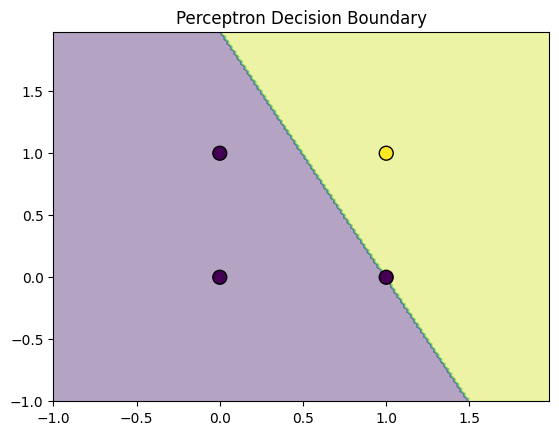

----------------------------------------
Training Perceptron for NAND Gate
Trained Model Weights: [ 0.2 -0.2 -0.1]
Predictions for NAND gate: [1, 1, 1, 0]


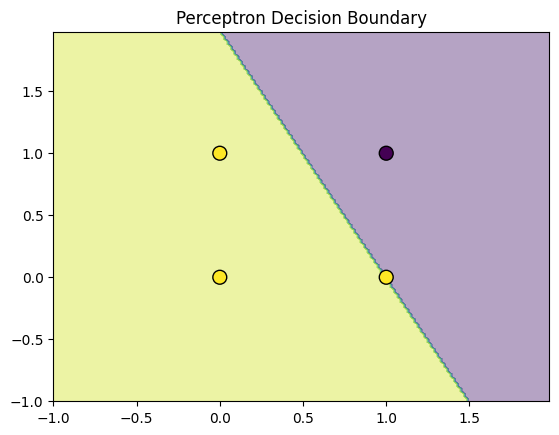

----------------------------------------
Training Perceptron for XOR Gate
Trained Model Weights: [ 0.  -0.1  0. ]
Predictions for XOR gate: [1, 1, 0, 0]


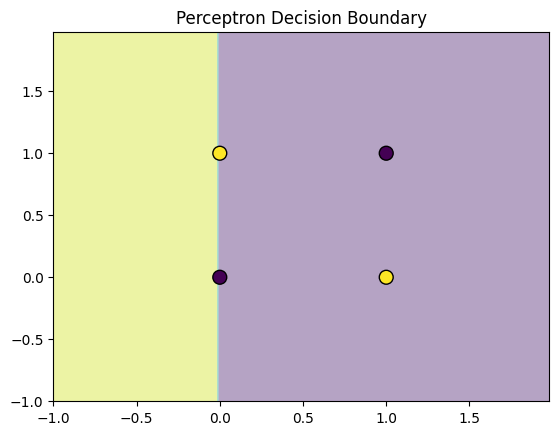

----------------------------------------
Training Perceptron for XNOR Gate
Trained Model Weights: [-0.1  0.1  0. ]
Predictions for XNOR gate: [0, 0, 1, 1]


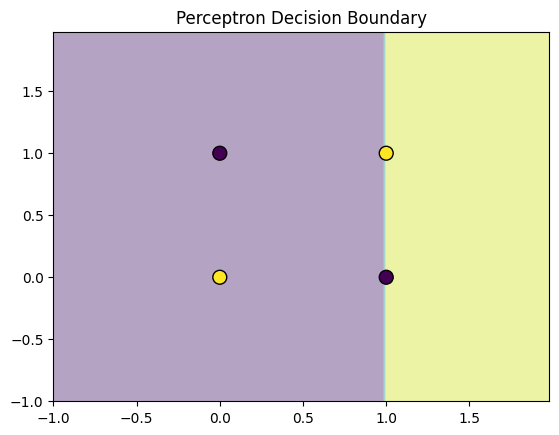

----------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # +1 for bias

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                # Update weights based on the error
                self.weights[1:] += self.learning_rate * (target - prediction) * inputs
                self.weights[0] += self.learning_rate * (target - prediction)  # Update bias

# Define the logic gate inputs and outputs
def generate_data(gate_type):
    if gate_type == 'AND':
        # AND Gate: output = 1 if both inputs are 1, else 0
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate_type == 'OR':
        # OR Gate: output = 1 if at least one input is 1
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif gate_type == 'NOT':
        # NOT Gate: output = 1 if input is 0, else 0
        X = np.array([[0], [1]])
        y = np.array([1, 0])
    elif gate_type == 'NAND':
        # NAND Gate: output = 0 if both inputs are 1, else 1
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([1, 1, 1, 0])
    elif gate_type == 'XOR':
        # XOR Gate: output = 1 if inputs are different, else 0
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 0])
    elif gate_type == 'XNOR':
        # XNOR Gate: output = 1 if inputs are the same, else 0
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([1, 0, 0, 1])
    return X, y

# Function to plot decision boundary (optional for 2D gates)
def plot_decision_boundary(X, y, perceptron):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = np.array([perceptron.predict(np.array([i, j])) for i, j in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title("Perceptron Decision Boundary")
    plt.show()

# Define and train perceptrons for each gate
gates = ['AND', 'NAND', 'XOR', 'XNOR']
for gate in gates:
    print(f"Training Perceptron for {gate} Gate")

    # Prepare data for each gate
    if gate == 'NOT':
        X, y = generate_data(gate)
        perceptron = Perceptron(input_size=1)  # Only one input for NOT gate
    else:
        X, y = generate_data(gate)
        perceptron = Perceptron(input_size=2)  # Two inputs for other gates

    # Train the perceptron
    perceptron.fit(X, y)

    # Test the trained perceptron
    print("Trained Model Weights:", perceptron.weights)

    # Test predictions
    predictions = [perceptron.predict(x) for x in X]
    print(f"Predictions for {gate} gate:", predictions)

    # Plot decision boundary for gates with 2 inputs (AND, NAND, XOR, XNOR)
    if gate in ['AND', 'NAND', 'XOR', 'XNOR']:
        plot_decision_boundary(X, y, perceptron)

    print("-" * 40)
